<a href="https://colab.research.google.com/github/aydawudu/Computer-Vision-Intro/blob/main/Multiclass_classfication_(RockPaperScissors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-11-30 14:18:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 64.233.170.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   111MB/s    in 1.7s    

2021-11-30 14:18:51 (111 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-11-30 14:18:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')


print('total training rock images: ', len(os.listdir(rock_dir)))
print('total training paper images: ', len(os.listdir(paper_dir)))
print('total training scissors images: ', len(os.listdir(scissors_dir)))

rock_file=os.listdir(rock_dir)
print(rock_file[:10])

paper_file=os.listdir(paper_dir)
print(paper_file[:10])

scissors_file=os.listdir(scissors_dir)
print(scissors_file[:10])

total training rock images:  840
total training paper images:  840
total training scissors images:  840
['rock06ck02-060.png', 'rock05ck01-000.png', 'rock02-101.png', 'rock01-104.png', 'rock01-103.png', 'rock04-080.png', 'rock02-083.png', 'rock07-k03-016.png', 'rock01-012.png', 'rock06ck02-041.png']
['paper06-070.png', 'paper06-101.png', 'paper05-055.png', 'paper07-101.png', 'paper06-053.png', 'paper04-115.png', 'paper04-042.png', 'paper07-074.png', 'paper06-049.png', 'paper06-057.png']
['scissors02-032.png', 'scissors04-013.png', 'scissors03-025.png', 'testscissors02-094.png', 'scissors03-104.png', 'scissors02-034.png', 'testscissors03-080.png', 'scissors03-012.png', 'testscissors01-117.png', 'testscissors03-044.png']


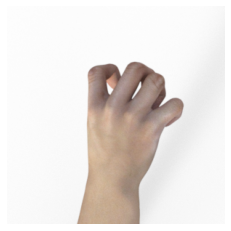

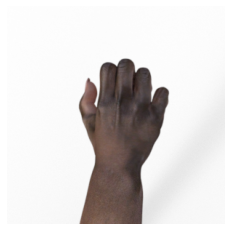

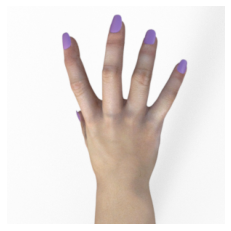

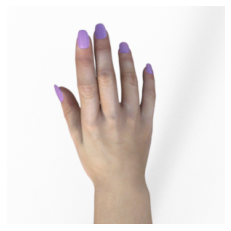

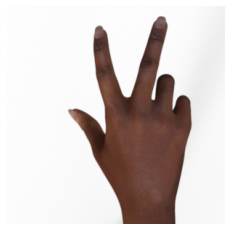

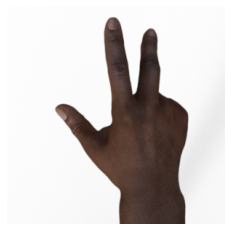

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index=2

next_rock=[os.path.join(rock_dir, fname)
              for fname in rock_file[pic_index-2:pic_index]]
next_paper=[os.path.join(paper_dir, fname)
              for fname in paper_file[pic_index-2:pic_index]]
next_scissors=[os.path.join(scissors_dir, fname)
                  for fname in scissors_file[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print (img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir="/tmp/rps/"
training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_dir="/tmp/rps-test-set/"
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=training_datagen.flow_from_directory(training_dir,
                                                     target_size= (150,150),
                                                     class_mode='categorical')
validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      class_mode='categorical')


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit_generator(train_generator, epochs=25, validation_data=validation_generator, verbose=1)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
79/79 [==============================] - 189s 2s/step - loss: 1.1180 - accuracy: 0.3663 - val_loss: 1.0441 - val_accuracy: 0.6075
Epoch 2/25
79/79 [==============================] - 189s 2s/step - loss: 0.8693 - accuracy: 0.6091 - val_loss: 0.6709 - val_accuracy: 0.7231
Epoch 3/25
79/79 [==============================] - 184s 2s/step - loss: 0.5457 - accuracy: 0.7837 - val_loss: 0.1516 - val_accuracy: 0.9462
Epoch 4/25
79/79 [==============================] - 184s 2s/step - loss: 0.3831 - accuracy: 0.8496 - val_loss: 0.7177 - val_accuracy: 0.6640
Epoch 5/25
79/79 [==============================] - 183s 2s/step - loss: 0.2783 - accuracy: 0.8897 - val_loss: 0.0801 - val_accuracy: 0.9839
Epoch 6/25
79/79 [==============================] - 184s 2s/step - loss: 0.2103 - accuracy: 0.9266 - val_loss: 0.0559 - val_accuracy: 0.9704
Epoch 7/25
79/79 [==============================] - 185s 2s/step - loss: 0.2158 - accuracy: 0.9266 - val_loss: 0.0647 - val_accuracy: 0.9785
Epoch 8/25
79

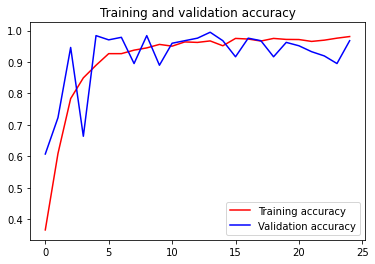

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path=fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)